## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Sidorczuk Nicolás Andrés

***
## Ventanas


<div class="alert alert-block alert-info">
<b>1)</b> Implemente las funciones para generar las siguientes ventanas $w(k)$:

</div>

+ Bartlett ó triangular
+ Hann
+ Blackman
+ Flat-top



<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede consultar el capítulo 6.3 del libro de B. Porat para obtener las expresiones analíticas de cada ventana.

</div>

   a) Para cada ventana grafique $w(k)$ y el módulo de su espectro $ \lvert W(\Omega) \rvert $


In [2]:
## Inicialización del Notebook del TP2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML

N  = 1000 # muestras
fs = 1000 # Hz

# Insertar aquí el código para inicializar tu notebook
########################################################
from Funciones import *
from math import log10, floor
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

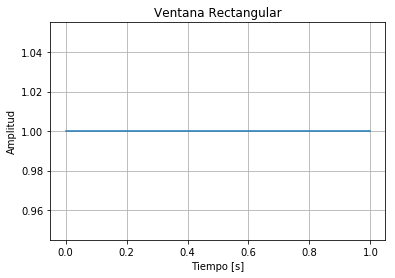

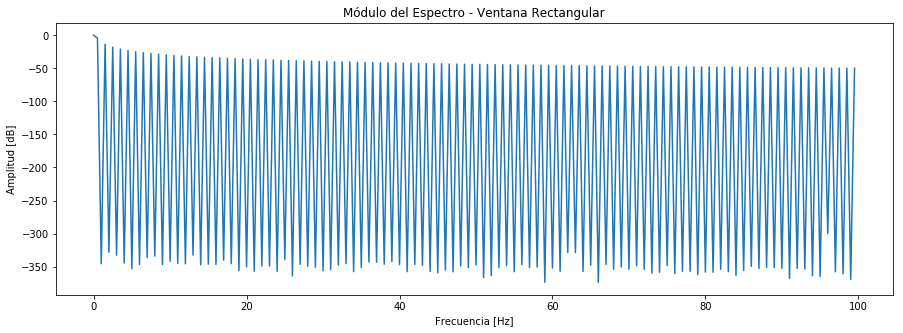

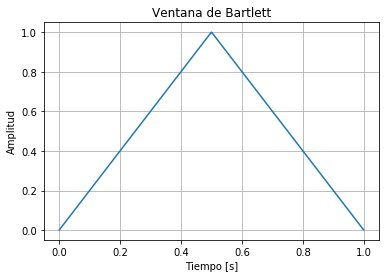

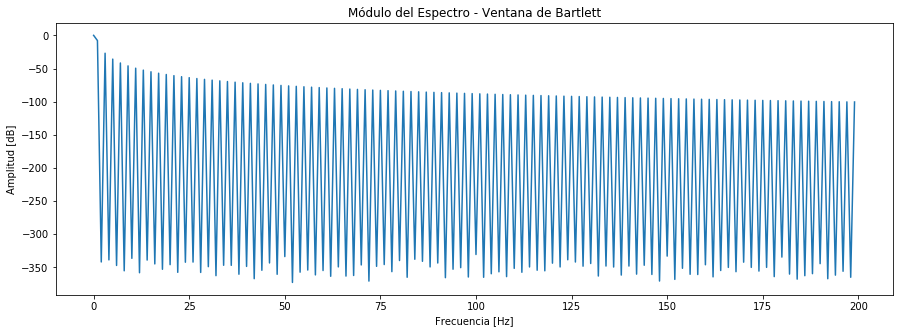

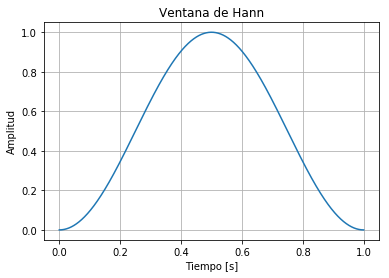

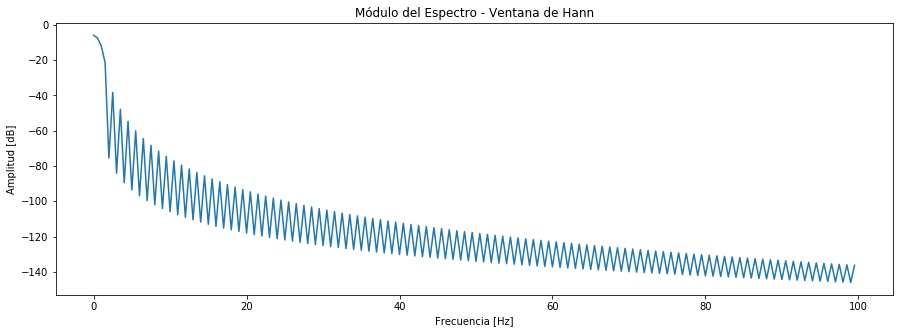

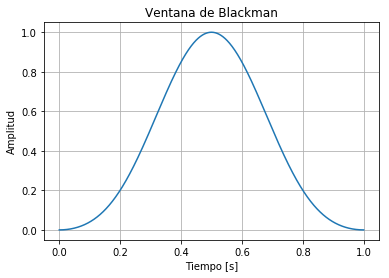

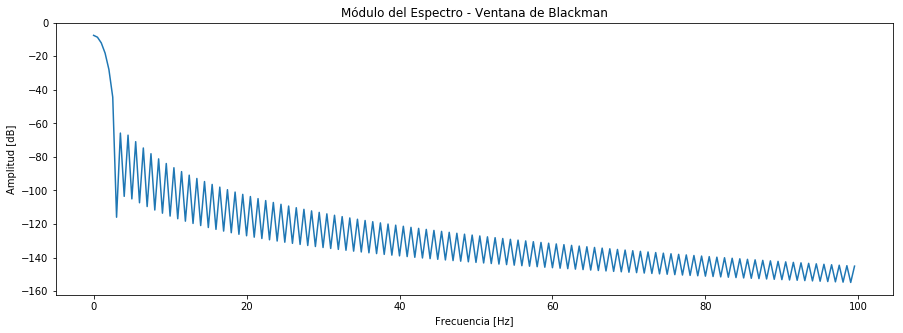

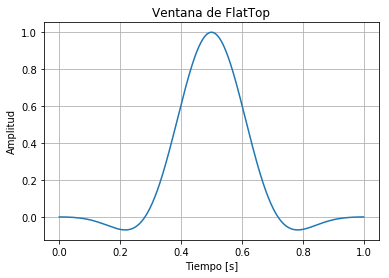

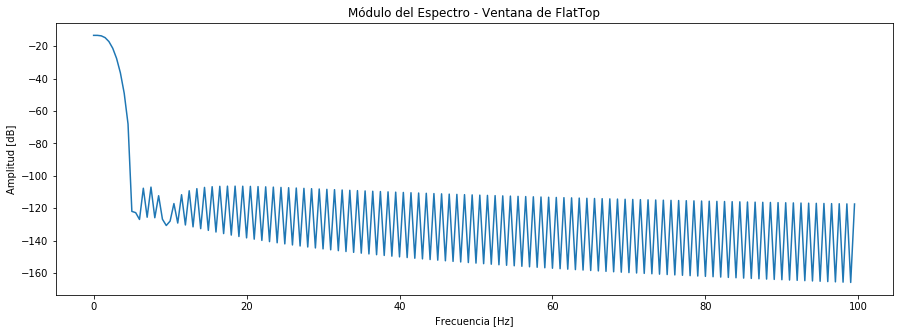

In [3]:
def RecW(N):
    w = []
    for i in range(N):
        w.append( 1 )
    return w

def BartlettW(N):
    w = []
    for i in range(N):
        w.append( 1 - abs(2*i-N+1)/(N+1) )
    return w

def HannW(N):
    w = []
    for i in range(N):
        w.append( 0.5*(1 - np.cos(2*np.pi*i/(N-1)) ) )
    return w

def BlackmanW(N):
    w = []
    for i in range(N):
        w.append( 0.42 - 0.5*(np.cos(2*np.pi*i/(N-1)) ) + 0.08*(np.cos(4*np.pi*i/(N-1)) ))
    return w

def FlatTopW(N):
    w = []
    for i in range(N):
        aux = 0.21557895
        aux -= 0.41663158 * np.cos(2*np.pi*i/(N-1))
        aux += 0.277263158 * np.cos(4*np.pi*i/(N-1))
        aux -= 0.083578947 * np.cos(6*np.pi*i/(N-1))
        aux += 0.006947368 * np.cos(8*np.pi*i/(N-1))
        w.append( aux )
    return w
########################################################
N  = 1000 # muestras
fs = 1000 # Hz
ts = 1/fs
Nz = N
x = np.linspace(0,(N-1)*ts,N)
Z = np.zeros([Nz,1]) 

#### Rectangular ####
w = RecW(N)
PrintArb(x,w,'Tiempo [s]','Amplitud','Ventana Rectangular')
w = np.array(w)
w = w.reshape(N,1)
w = np.vstack((w,Z))
E,f = Analizador_de_Espectro(w,N+Nz,ts)
R = int(N+Nz)
for i in range(R):
    if E[0][i] == 0:
        E[0][i] = 1e-12
PrintModule(f,E,0,200,15,5,'Ventana Rectangular','plot',scale="log")

#### Bartlett ####
w = BartlettW(N)
PrintArb(x,w,'Tiempo [s]','Amplitud','Ventana de Bartlett')
w = np.array(w)
w = w.reshape(N,1)
#w = np.vstack((w,Z))
E,f = Analizador_de_Espectro(w,N,ts)
#R = int(N+Nz)
for i in range(N):
    if E[0][i] == 0:
        E[0][i] = 1e-12
PrintModule(f,E,0,200,15,5,'Ventana de Bartlett','plot',scale="log")

#### Hann ####
w = HannW(N)
PrintArb(x,w,'Tiempo [s]','Amplitud','Ventana de Hann')
w = np.array(w)
w = w.reshape(N,1)
w = np.vstack((w,Z))
E,f = Analizador_de_Espectro(w,N+Nz,ts)
R = int(N+Nz)
for i in range(R):
    if E[0][i] == 0:
        E[0][i] = 1e-12
PrintModule(f,E,0,200,15,5,'Ventana de Hann','plot',scale="log")

#### Blackman ####
w = BlackmanW(N)
PrintArb(x,w,'Tiempo [s]','Amplitud','Ventana de Blackman')
w = np.array(w)
w = w.reshape(N,1)
w = np.vstack((w,Z))
E,f = Analizador_de_Espectro(w,N+Nz,ts)
R = int(N+Nz)
for i in range(R):
    if E[0][i] == 0:
        E[0][i] = 1e-12
PrintModule(f,E,0,200,15,5,'Ventana de Blackman','plot',scale="log")

#### FlatTop ####
w = FlatTopW(N)
PrintArb(x,w,'Tiempo [s]','Amplitud','Ventana de FlatTop')
w = np.array(w)
w = w.reshape(N,1)
w = np.vstack((w,Z))
E,f = Analizador_de_Espectro(w,N+Nz,ts)
R = int(N+Nz)
for i in range(R):
    if E[0][i] == 0:
        E[0][i] = 1e-12
PrintModule(f,E,0,200,15,5,'Ventana de FlatTop','plot',scale="log")


b) Construya una tabla en la que figure la anchura normalizada del lóbulo principal  de la ventana, $\Omega_1$, siendo 

$$ \lvert W(\Omega_1) \rvert = \frac{\sqrt{2}}{2}$$ 

y el valor de transferencia máxima de los lóbulos secundarios expresado en dB 

$$ W_2 = \mathop{max} \{\lvert W(\Omega) \rvert\} ,\space\space \forall \space \Omega \geq \Omega_0 $$

siendo $\Omega_0$ la frecuencia del primer cruce por cero $\lvert W(\Omega) \rvert\ = 0$ ó la frecuencia límite superior del lóbulo principal. Utilice como norma de frecuencia la frecuencia de Nyquist, de manera que las mediciones de frecuencias sean adimensionales y comparables independientemente de la frecuencia de muestreo.

In [4]:
FNor= (fs/4)/((np.pi)/2)
#######################################
# Tu simulación que genere resultados #
#######################################
Om_Rec = 0.4 #Hz
Om_Bartlett = 0.5 #Hz
Om_Hann = 0.67 #Hz
Om_Blackman = 0.78 #Hz
Om_FlatTop = 1.82 #Hz
tus_resultados = [ 
                   [str(round_sig(Om_Rec/FNor,3)), '-13.46'], # <-- acá debería haber numeritos :)
                   [str(round_sig(Om_Bartlett/FNor,3)), '-26.68'], # <-- acá debería haber numeritos :)
                   [str(round_sig(Om_Hann/FNor,3)), '-32'], # <-- acá debería haber numeritos :)
                   [str(round_sig(Om_Blackman/FNor,3)), '-58'], # <-- acá debería haber numeritos :)
                   [str(round_sig(Om_FlatTop/FNor,3)), '-94'] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$f_1$ (rad)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$f_1$ (rad),$W_2$ (dB)
Rectangular,0.00251,-13.46
Bartlett,0.00314,-26.68
Hann,0.00421,-32
Blackman,0.0049,-58
Flat-top,0.0114,-94


<div class="alert alert-block alert-info">
<b>2)</b> Genere una señal bitonal de las siguientes características
</div>


  $  x(k) = x_1(k) + x_2(k) $

  $  x_1(k) = sen(\Omega_1·k)$

  $  x_2(k) = a_2 · sen(\Omega_2·k)   $

siendo 

  $\Omega_1 = \frac{\pi}{2}$

  $\Omega_2 = \Omega_1 + 10·\frac{2\pi}{N}$

  $a_2 = -40$ dB


Responda a las siguientes consignas:

<div class="alert alert-block alert-info">
<b>2.a)</b>  Calcule el espectro $ \lvert X(\Omega) \rvert $

</div>

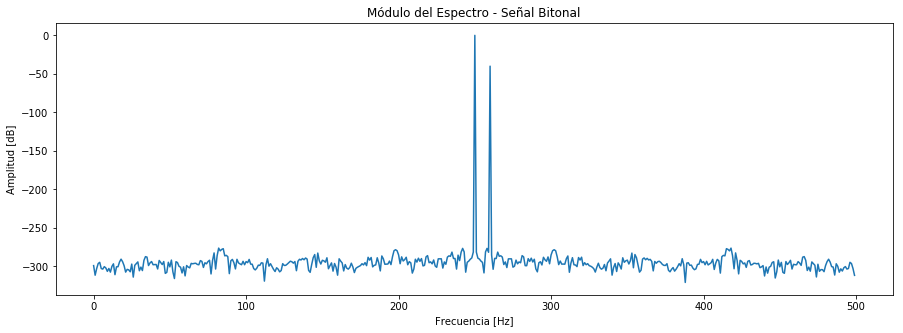

In [25]:
fs=1000
Ts=1/fs
N=1000
f0=fs/4
a1=1
a2 = a1/100 # 40dB menos que a1
p0=0

Om1 = (np.pi)/2 # pi/2
Om2 = Om1 + (10 * 2 * np.pi)/N
FF= f0/Om1

t,s1 = Senoidal_Generator(fs,(Om1*FF),N,a1,p0)
t,s2 = Senoidal_Generator(fs,(Om2*FF),N,a2,p0)
S = s1+s2

E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal",'plot','log')

<div class="alert alert-block alert-info">
<b>2.b)</b> Repita a) disminuyendo la amplitud de $x_2$.
</div>

¿Cuál es el factor de escala mínimo de $x_2$, definido como $a^0_2$, que permite evidenciar su existencia en el espectro de $\lvert X(\Omega) \rvert$ ?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En forma conceptual si observamos que la amplitud de $x_2$ es de -40dB (respecto a x1) y que el piso de ruido está a -300dB entonces el rango dinámico que tengo para decrementar $x_2$ es de 260dB. En la práctica si hago esto la señal x2 quedaria a la misma altura que el ruido y no se la reconoce. Experimentalmente con un valor de a2=1e-13 se logra un pico que aparenta ser una componente, pero menos que eso ya no reconoce claramente. El factor de escala sería 1e-13 teniendo en cuenta la amplitud de -40dB que ya tenía $x_2$ $a^0_2$=1e-11
</div>

¿De qué depende poder medir $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Depende del piso de ruido. Como las 2 componentes presentes coinciden con bines se espera que en el espectro solo tenga energía en dichos bines y que sea cero en el resto. Sin embargo luego de la fft en los demás bines hay energía pero de valores muchisimo mas pequeños. Al graficar en escala logarítmica logramos ver esta diferencia. Por lo tanto al no valer 0 o menos infinito en la escala logarítmica, hay un límite inferior a la mínima amplitud de señal que se puede reconocer.
</div>

Considere ahora que esta señal proviene de un ADC de 16 bits. Incorpore al análisis el correspondiente ruido de cuantización. ¿Cómo afecta esta situación la medición de $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Al cuantificar la señal se agrega ruido de cuantización cuya potencia depende de $q$, igual a un LSB, que en este caso es de $1/2^{n-1}$, con n=16bits. Si calculamos el valor RMS y lo pasamos a dB nos da aproximadamente -101dB. Como este valor es mucho menor que el piso de ruido de la señal no cuanticada entonces pasa a ser el nuevo piso de ruido. Con respecto a x2, ahora hay un margen menor para reducir su amplitud y poder seguir identificándolo en el espectro.
</div>

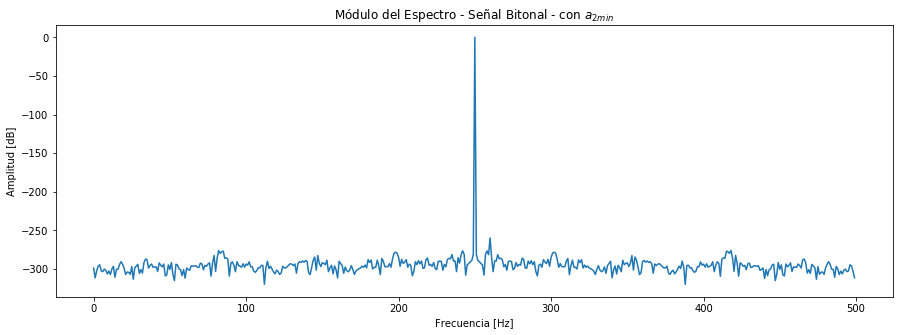

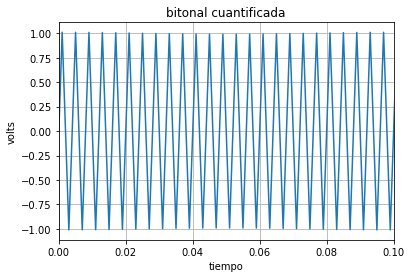

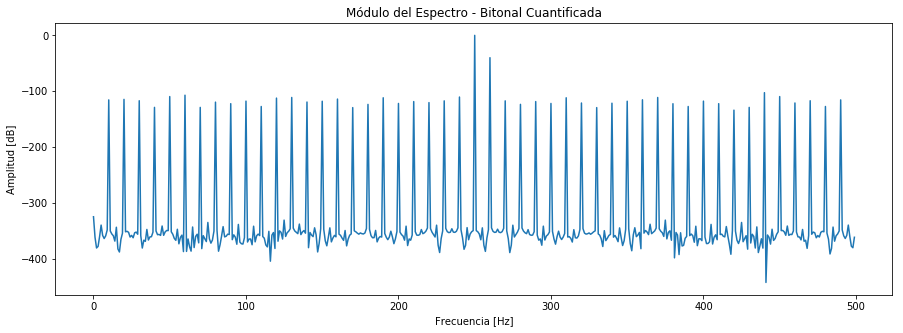

In [26]:
a2min = 1e-13 * 1 # 2.b)
t,s2 = Senoidal_Generator(fs,(Om2*FF),N,a2min,p0)
S_2 = s1+s2

E,f = Analizador_de_Espectro(S_2,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - con $a_{2min}$",'plot','log')
#####################################################
n = 16 # 16bits
Sq = quant(S,n)
Sq /= ((2**(n-1))-1)*0.9
PrintArb(t,Sq,'tiempo','volts','bitonal cuantificada')
axes = plt.gca()
axes.set_xlim([0,0.1])
E,f = Analizador_de_Espectro(Sq,N,Ts)
for i in range(N):
    if E[0][i] == 0:
        E[0][i] = 1e-12
PrintModule(f,E,0,N/2,15,5,"Bitonal Cuantificada",'plot','log')

<div class="alert alert-block alert-info">
<b>2.c)</b> Repita a) incrementando la frecuencia de $x_1$ para $\Omega_1 = \frac{\pi}{2} + d_1·\frac{2\pi}{N}$ para valores de $d_1 = (0,01; 0.25; 0.5)$. Aumente la amplitud de $a_2$ hasta que se evidencie sobre el leakage y construya una tabla con dicho valor para las 3 situaciones correspondientes a desintonías leve, moderada y máxima.
</div>

,$a_2$ (dB)
leve,-53
moderada,-28
máxima,-31


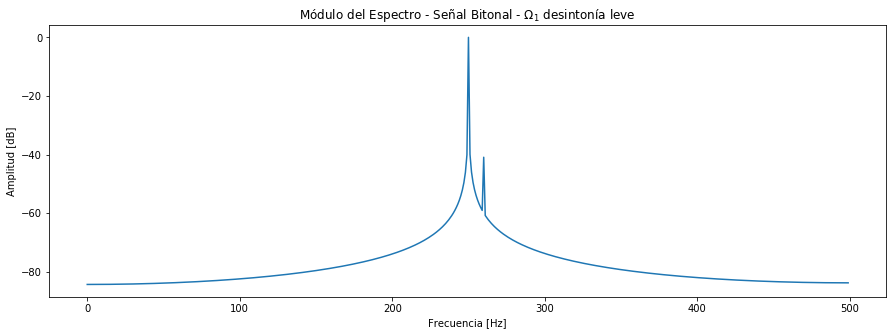

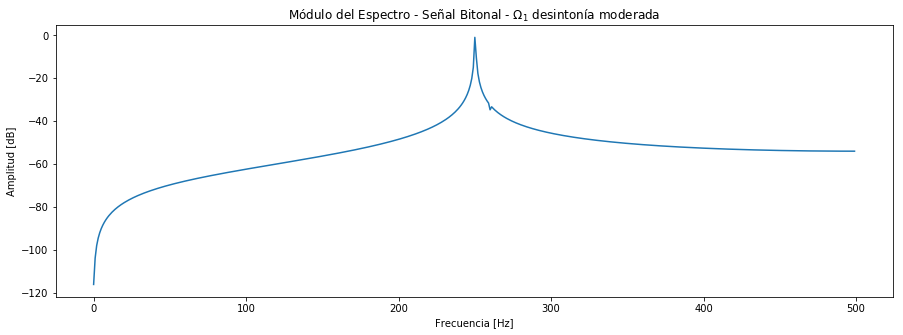

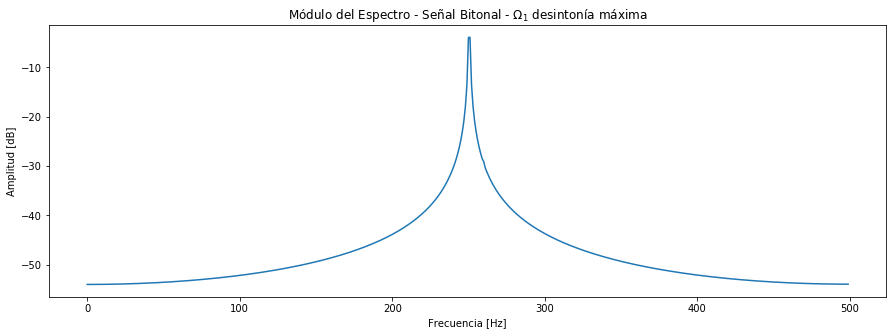

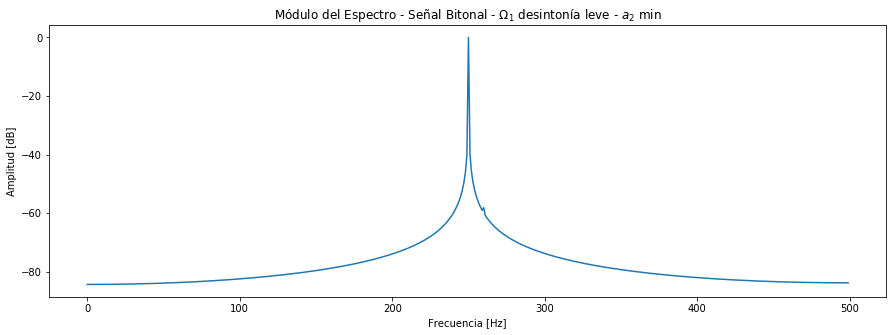

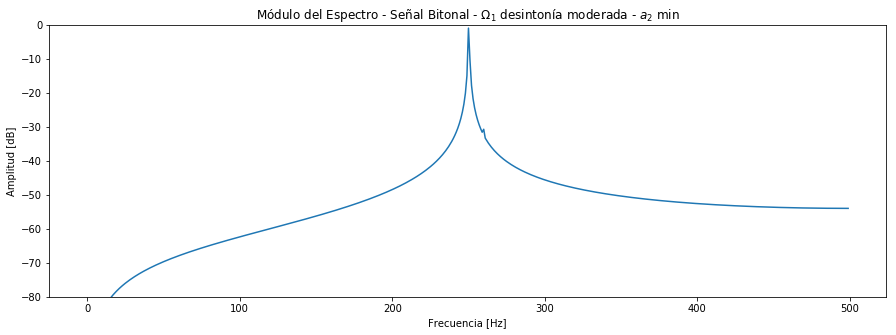

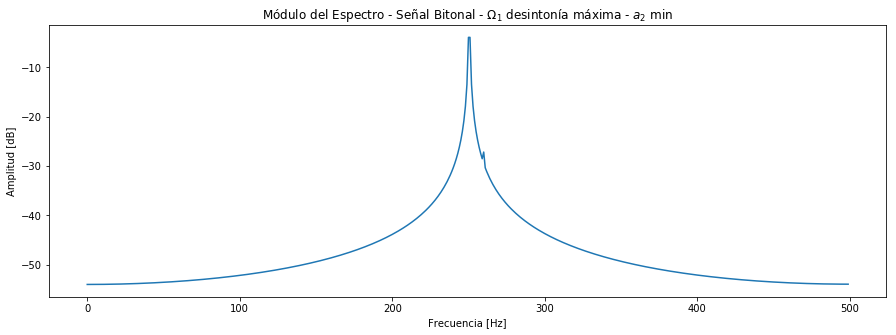

In [7]:
fs=1000
Ts=1/fs
N=1000
f0=fs/4
a1=1
a2 = a1/100 # 40dB menos que a1
p0=0

Om1 = (np.pi)/2 # pi/2
Om2 = Om1 + (10 * 2 * np.pi)/N
FF= f0/Om1

#####  Desintonía leve #####
Om1d = Om1 + 0.01 * (2*np.pi/N)
t,s1 = Senoidal_Generator(fs,(Om1d*FF),N,a1,p0)
t,s2 = Senoidal_Generator(fs,(Om2*FF),N,a2,p0)
S = s1+s2
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - $Ω_1$ desintonía leve",'plot','log')

#####  Desintonía moderada #####
Om1d = Om1 + 0.25 * (2*np.pi/N)
t,s1 = Senoidal_Generator(fs,(Om1d*FF),N,a1,p0)
t,s2 = Senoidal_Generator(fs,(Om2*FF),N,a2,p0)
S = s1+s2
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - $Ω_1$ desintonía moderada",'plot','log')

#####  Desintonía máxima #####
Om1d = Om1 + 0.5 * (2*np.pi/N)
t,s1 = Senoidal_Generator(fs,(Om1d*FF),N,a1,p0)
t,s2 = Senoidal_Generator(fs,(Om2*FF),N,a2,p0)
S = s1+s2
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - $Ω_1$ desintonía máxima",'plot','log')

###### Busco a2 min ########
#####  Desintonía leve #####
Om1d = Om1 + 0.01 * (2*np.pi/N)
a2m_leve = -53 #Amplitud en dB de a2 con respecto a a1=1 que permite ver a a2
a2 = a1 * 10**(a2m_leve/20)
t,s1 = Senoidal_Generator(fs,(Om1d*FF),N,a1,p0)
t,s2 = Senoidal_Generator(fs,(Om2*FF),N,a2,p0)
S = s1+s2
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - $Ω_1$ desintonía leve - $a_2$ min",'plot','log')

#####  Desintonía moderada #####
Om1d = Om1 + 0.25 * (2*np.pi/N)
a2m_mod = -28 #Amplitud en dB de a2 con respecto a a1=1 que permite ver a a2
a2 = a1 * 10**(a2m_mod/20)
t,s1 = Senoidal_Generator(fs,(Om1d*FF),N,a1,p0)
t,s2 = Senoidal_Generator(fs,(Om2*FF),N,a2,p0)
S = s1+s2
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - $Ω_1$ desintonía moderada - $a_2$ min",'plot','log')
axes = plt.gca()
axes.set_ylim([-80,0])

#####  Desintonía máxima #####
Om1d = Om1 + 0.5 * (2*np.pi/N)
a2m_max = -31 #Amplitud en dB de a2 con respecto a a1=1 que permite ver a a2
a2 = a1 * 10**(a2m_max/20)
t,s1 = Senoidal_Generator(fs,(Om1d*FF),N,a1,p0)
t,s2 = Senoidal_Generator(fs,(Om2*FF),N,a2,p0)
S = s1+s2
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - $Ω_1$ desintonía máxima - $a_2$ min",'plot','log')


tus_resultados = [ 
                   str(a2m_leve), # <-- acá debería haber numeritos :)
                   str(a2m_mod), # <-- acá debería haber numeritos :)
                   str(a2m_max) # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a_2$ (dB)'],
               index=[  
                        'leve',
                        'moderada',
                        'máxima',
                     ])
HTML(df.to_html())

<div class="alert alert-block alert-info">
<b>2.d)</b> Evalúe el efecto de utilizar las ventanas implementadas en 1). Complete la tabla comparativa con respecto a la ventana rectangular, respecto a las mediciones $a^0_2$ realizada en 2.b); y $a^1_2$ en 2.c) para el caso de desintonía máxima.
</div>

Grafique $\lvert X_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w(k) \} \rvert $ para las 4 ventanas de 1).

(-150, 0)

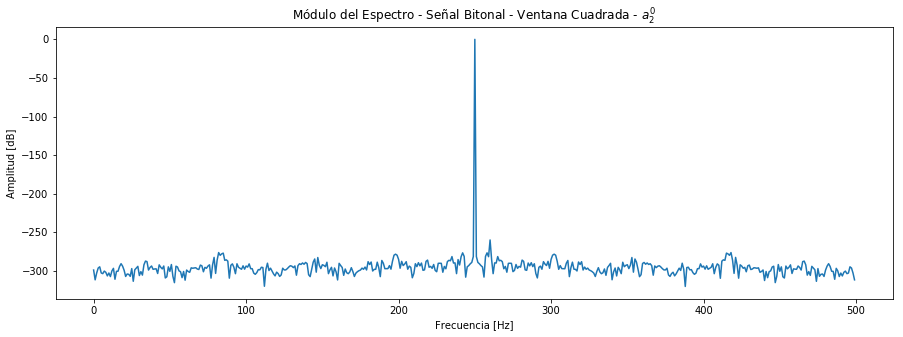

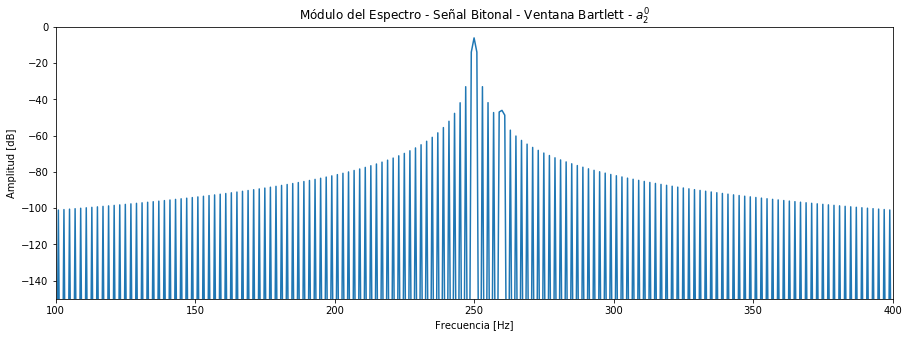

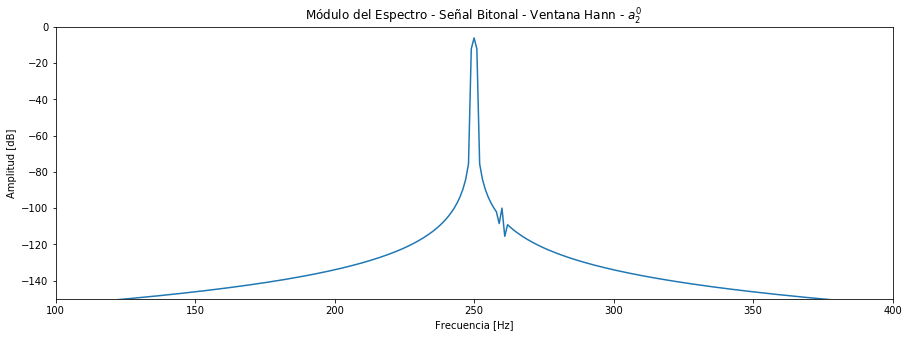

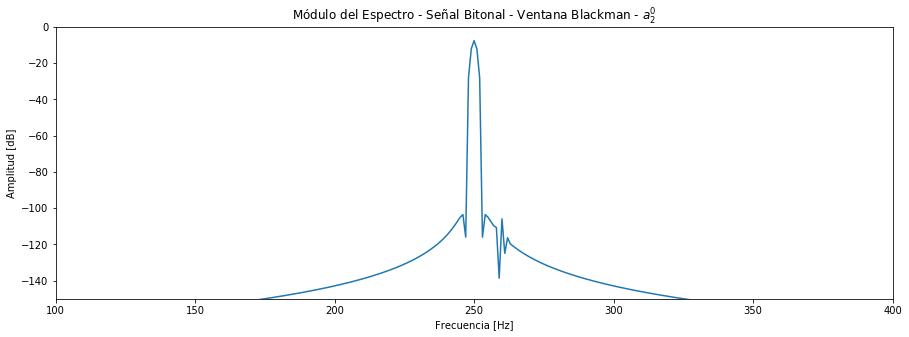

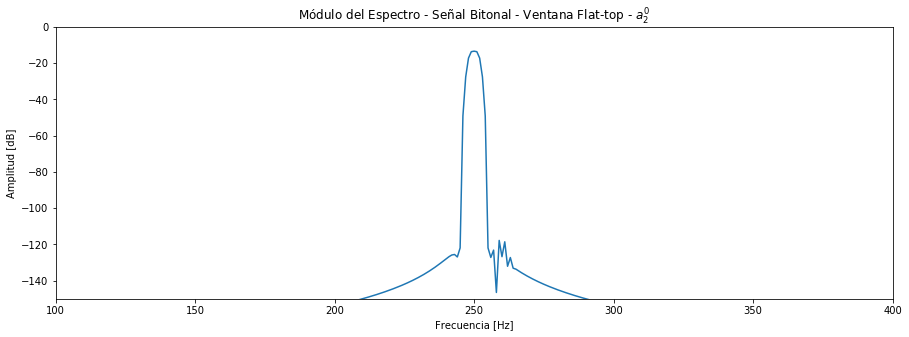

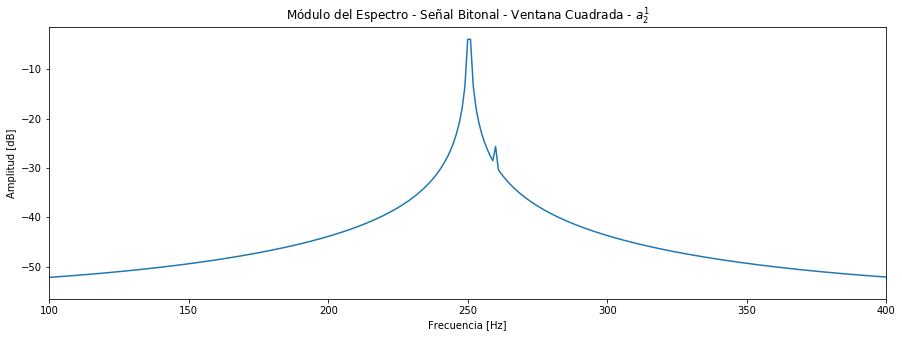

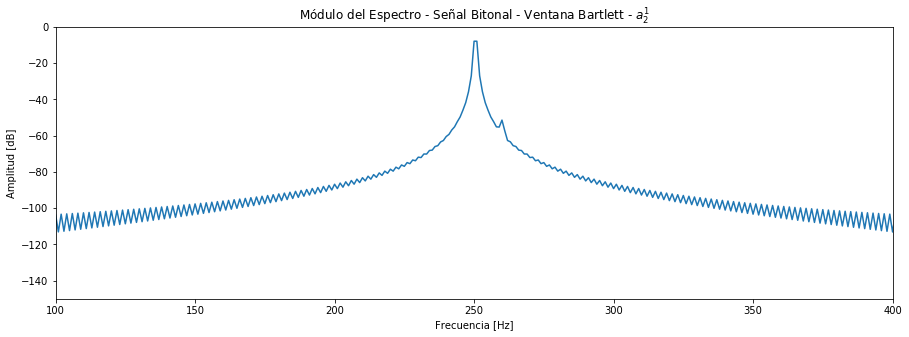

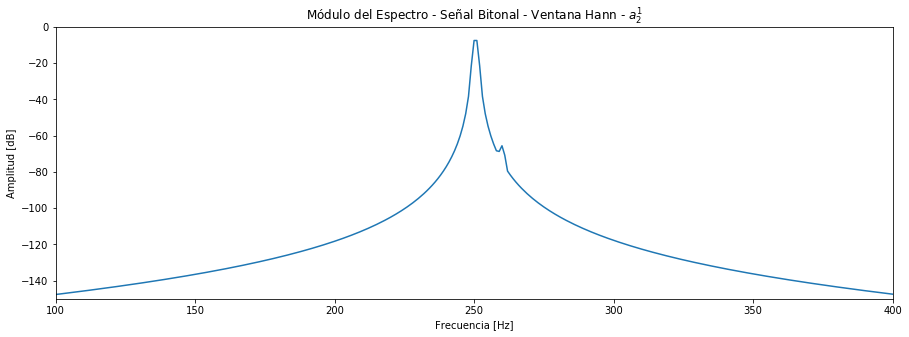

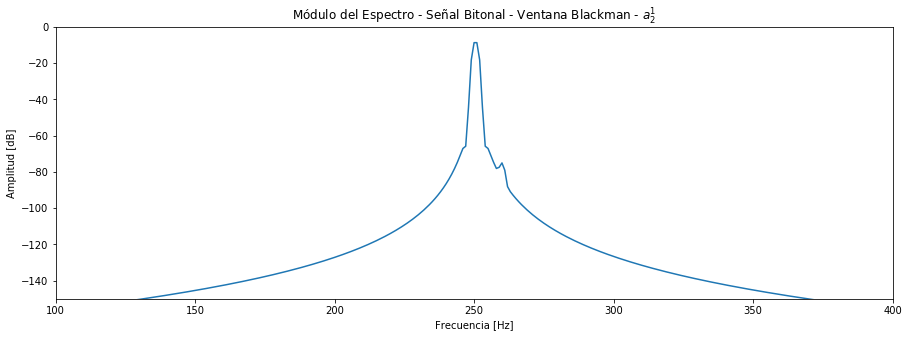

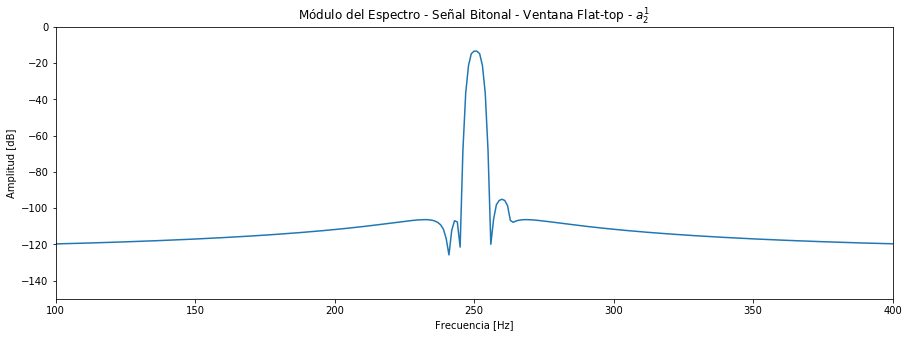

In [8]:
fs=1000
Ts=1/fs
N=1000
f0=fs/4
a1=1
a2 = a1/100 # 40dB menos que a1
p0=0

Om1 = (np.pi)/2 # pi/2
Om2 = Om1 + (10 * 2 * np.pi)/N
FF= (fs/4)/(np.pi/2)

#############  a2_0  ###################### Todos los a2_0 a partir de a2 = a1/100 (-40dB)
########## Rectangular ##############
a2_0Rec = a2 * 1e-11 # 2.b)

t,s1 = Senoidal_Generator(fs,(Om1*FF),N,a1,p0)
t,s2 = Senoidal_Generator(fs,(Om2*FF),N,a2_0Rec,p0)
S = s1+s2
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - Ventana Cuadrada - $a^0_2$",'plot','log')

########## Bartlett ##############
a2_0Bar = a2# * 1e-2 
t,s1 = Senoidal_Generator(fs,(Om1*FF),N,a1,p0)
t,s2 = Senoidal_Generator(fs,(Om2*FF),N,a2_0Bar,p0)
S = s1+s2
W = BartlettW(N)
W = np.array(W)
W = W.reshape(N,1)
S = S * W
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - Ventana Bartlett - $a^0_2$",'plot','log')
axes = plt.gca()
axes.set_xlim([100,400])
axes.set_ylim([-150,0])

########## Hann ##############
a2_0Hann = a2 * 1e-3
t,s1 = Senoidal_Generator(fs,(Om1*FF),N,a1,p0)
t,s2 = Senoidal_Generator(fs,(Om2*FF),N,a2_0Hann,p0)
S = s1+s2
W = HannW(N)
W = np.array(W)
W = W.reshape(N,1)
S = S * W
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - Ventana Hann - $a^0_2$",'plot','log')
axes = plt.gca()
axes.set_xlim([100,400])
axes.set_ylim([-150,0])

########## Blackman ##############
a2_0Black = a2 * 1e-4 * 8
t,s1 = Senoidal_Generator(fs,(Om1*FF),N,a1,p0)
t,s2 = Senoidal_Generator(fs,(Om2*FF),N,a2_0Black,p0)
S = s1+s2
W = BlackmanW(N)
W = np.array(W)
W = W.reshape(N,1)
S = S * W
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - Ventana Blackman - $a^0_2$",'plot','log')
axes = plt.gca()
axes.set_xlim([100,400])
axes.set_ylim([-150,0])

########## Flat-top ##############
a2_0FlatTop = a2 * 1e-4 *4
t,s1 = Senoidal_Generator(fs,(Om1*FF),N,a1,p0)
t,s2 = Senoidal_Generator(fs,(Om2*FF),N,a2_0FlatTop,p0)
S = s1+s2
W = FlatTopW(N)
W = np.array(W)
W = W.reshape(N,1)
S = S * W
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - Ventana Flat-top - $a^0_2$",'plot','log')
axes = plt.gca()
axes.set_xlim([100,400])
axes.set_ylim([-150,0])

#############  a2_1  ###################### Todos los a2_1 a partir de a2 = a1/100 (-40dB)
Om1 = Om1 + 0.5 * (2*np.pi/N) #Desintonizo
t,s1 = Senoidal_Generator(fs,(Om1*FF),N,a1,p0)
########## Rectangular ##############
a2_1Rec = a2 *4
t,s2 = Senoidal_Generator(fs,(Om2*FF),N,a2_1Rec,p0)
S = s1+s2
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - Ventana Cuadrada - $a^1_2$",'plot','log')
axes = plt.gca()
axes.set_xlim([100,400])

########## Bartlett ##############
a2_1Bar = a2 * 0.5
t,s2 = Senoidal_Generator(fs,(Om2*FF),N,a2_1Bar,p0)
S = s1+s2
W = BartlettW(N)
W = np.array(W)
W = W.reshape(N,1)
S = S * W
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - Ventana Bartlett - $a^1_2$",'plot','log')
axes = plt.gca()
axes.set_xlim([100,400])
axes.set_ylim([-150,0])

########## Hann ##############
a2_1Hann = a2 * 1e-1
t,s2 = Senoidal_Generator(fs,(Om2*FF),N,a2_1Hann,p0)
S = s1+s2
W = HannW(N)
W = np.array(W)
W = W.reshape(N,1)
S = S * W
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - Ventana Hann - $a^1_2$",'plot','log')
axes = plt.gca()
axes.set_xlim([100,400])
axes.set_ylim([-150,0])

########## Blackman ##############
a2_1Black = a2 * 1e-2 *4
t,s2 = Senoidal_Generator(fs,(Om2*FF),N,a2_1Black,p0)
S = s1+s2
W = BlackmanW(N)
W = np.array(W)
W = W.reshape(N,1)
S = S * W
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - Ventana Blackman - $a^1_2$",'plot','log')
axes = plt.gca()
axes.set_xlim([100,400])
axes.set_ylim([-150,0])

########## Flat-top ##############
a2_1FlatTop = a2 * 1e-3 *8
t,s2 = Senoidal_Generator(fs,(Om2*FF),N,a2_1FlatTop,p0)
S = s1+s2
W = FlatTopW(N)
W = np.array(W)
W = W.reshape(N,1)
S = S * W
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - Ventana Flat-top - $a^1_2$",'plot','log')
axes = plt.gca()
axes.set_xlim([100,400])
axes.set_ylim([-150,0])

In [9]:
tus_resultados = [ 
                   [str(round_sig(20*np.log10(a2_0Rec/a2),3)), str(round_sig(20*np.log10(a2_1Rec/a2),3))], # <-- acá debería haber numeritos :)
                   [str(20*np.log10(a2_0Bar/a2)), str(round_sig(20*np.log10(a2_1Bar/a2),3))], # <-- acá debería haber numeritos :)
                   [str(round_sig(20*np.log10(a2_0Hann/a2),3)), str(round_sig(20*np.log10(a2_1Hann/a2),3))], # <-- acá debería haber numeritos :)
                   [str(round_sig(20*np.log10(a2_0Black/a2),3)), str(round_sig(20*np.log10(a2_1Black/a2),3))], # <-- acá debería haber numeritos :)
                   [str(round_sig(20*np.log10(a2_0FlatTop/a2),3)), str(round_sig(20*np.log10(a2_1FlatTop/a2),3))] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a^0_2$ (dB)','$a^1_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$a^0_2$ (dB),$a^1_2$ (dB)
Rectangular,-220.0,12.0
Bartlett,0.0,-6.02
Hann,-60.0,-20.0
Blackman,-61.9,-28.0
Flat-top,-68.0,-41.9


<div class="alert alert-block alert-info">
<b>2.e)</b> Para las ventanas analizadas en 1), decida cuál sería la más apropiada en el caso que, <b>sin afectar otro parámetro</b>, $\Omega_2$ pudiera acercarse libremente a $\Omega_1 = \frac{\pi}{2} + 0.5·\frac{2\pi}{N}$. Complete la siguiente tabla con la distancia mínima, $\Omega_0, $ a la que se puede distinguir $x_2$ en $\lvert X_w(\Omega) \rvert$.
</div>

,$\Omega_0$ (#)
Rectangular,0.0503
Bartlett,0.0314
Hann,0.0314
Blackman,0.0314
Flat-top,0.044


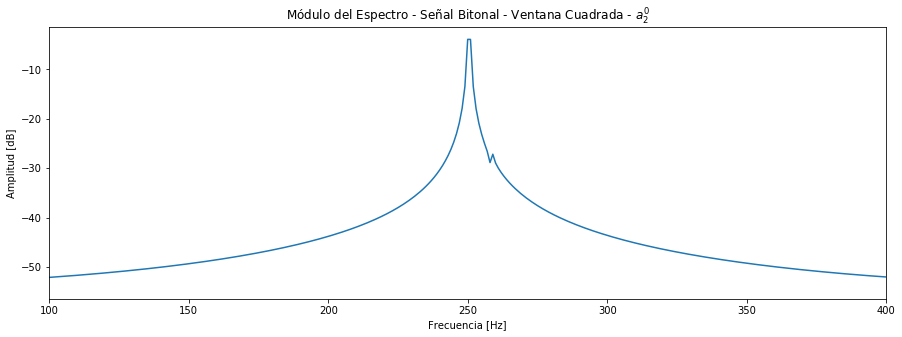

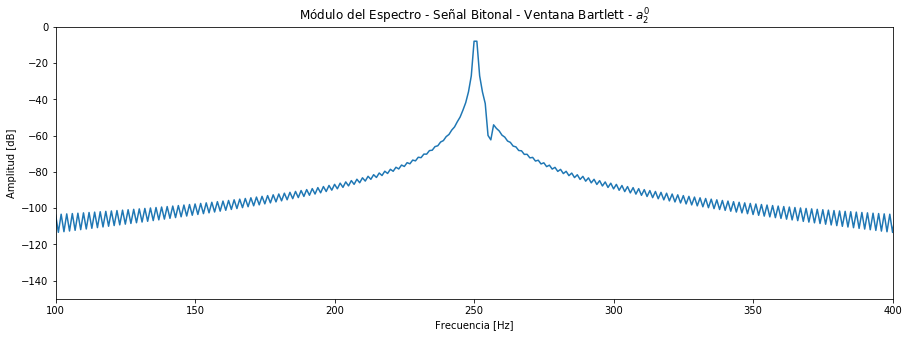

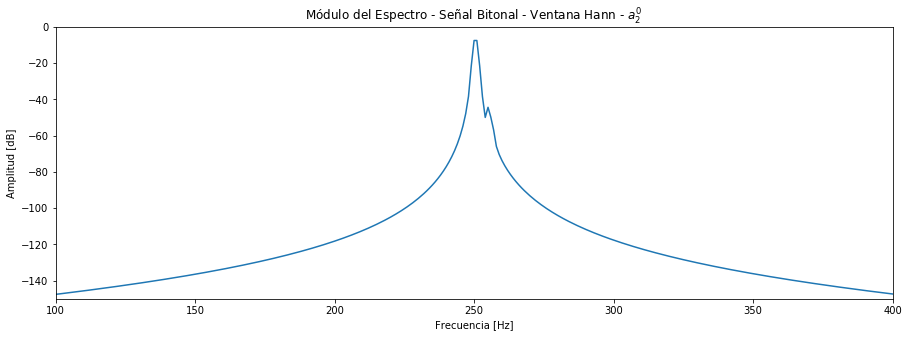

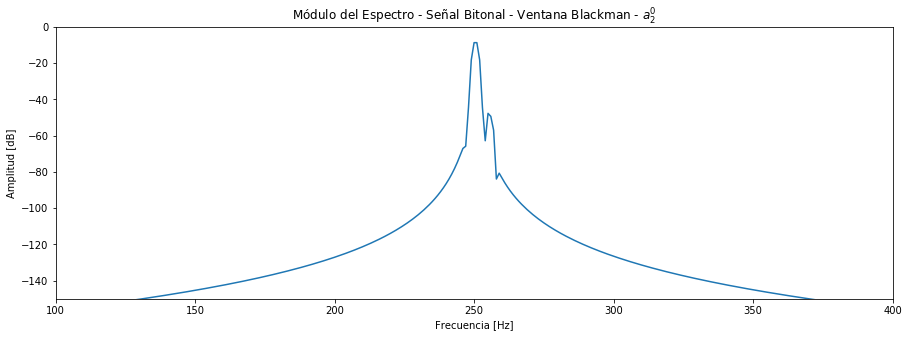

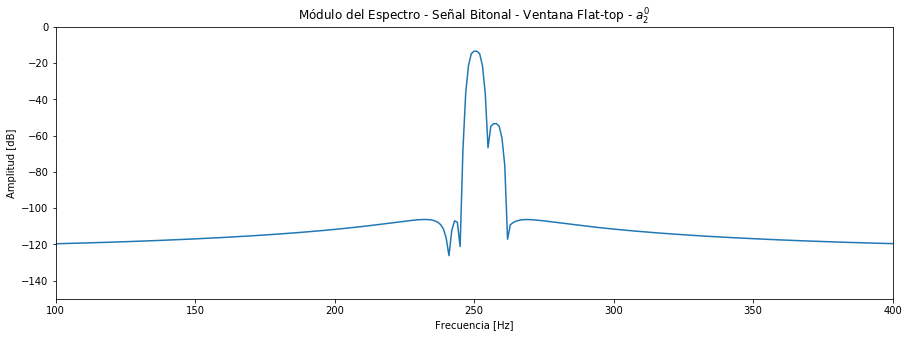

In [10]:
fs=1000
Ts=1/fs
N=1000
f0=fs/4
a1=1
a2 = a1/100 # 40dB menos que a1
p0=0

Om1 = (np.pi)/2 # pi/2
Om1 = Om1 + 0.5 * (2*np.pi/N) #Desintonizo
Om2 = Om1 + (10 * 2 * np.pi)/N
FF= (fs/4)/(np.pi/2)

########## Rectangular ##############
Om0_Rec = -2 * (2*np.pi/N)
Om2_Rec = Om2 + Om0_Rec
t,s1 = Senoidal_Generator(fs,(Om1*FF),N,a1,p0)
t,s2 = Senoidal_Generator(fs,(Om2_Rec*FF),N,a2,p0)
S = s1+s2
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - Ventana Cuadrada - $a^0_2$",'plot','log')
axes = plt.gca()
axes.set_xlim([100,400])

########## Bartlett ##############
Om0_Bar = -5 * (2*np.pi/N)
Om2_Bar = Om2 + Om0_Bar
t,s1 = Senoidal_Generator(fs,(Om1*FF),N,a1,p0)
t,s2 = Senoidal_Generator(fs,(Om2_Bar*FF),N,a2,p0)
S = s1+s2
W = BartlettW(N)
W = np.array(W)
W = W.reshape(N,1)
S = S * W
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - Ventana Bartlett - $a^0_2$",'plot','log')
axes = plt.gca()
axes.set_xlim([100,400])
axes.set_ylim([-150,0])

########## Hann ##############
Om0_Hann = -5 * (2*np.pi/N)
Om2_Hann = Om2 + Om0_Hann
t,s1 = Senoidal_Generator(fs,(Om1*FF),N,a1,p0)
t,s2 = Senoidal_Generator(fs,(Om2_Hann*FF),N,a2,p0)
S = s1+s2
W = HannW(N)
W = np.array(W)
W = W.reshape(N,1)
S = S * W
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - Ventana Hann - $a^0_2$",'plot','log')
axes = plt.gca()
axes.set_xlim([100,400])
axes.set_ylim([-150,0])

########## Blackman ##############
Om0_Black = -5 * (2*np.pi/N)
Om2_Black = Om2 + Om0_Black
t,s1 = Senoidal_Generator(fs,(Om1*FF),N,a1,p0)
t,s2 = Senoidal_Generator(fs,(Om2_Black*FF),N,a2,p0)
S = s1+s2
W = BlackmanW(N)
W = np.array(W)
W = W.reshape(N,1)
S = S * W
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - Ventana Blackman - $a^0_2$",'plot','log')
axes = plt.gca()
axes.set_xlim([100,400])
axes.set_ylim([-150,0])

########## Flat-top ##############
Om0_FlatTop = -3 * (2*np.pi/N)
Om2_FlatTop = Om2 + Om0_FlatTop
t,s1 = Senoidal_Generator(fs,(Om1*FF),N,a1,p0)
t,s2 = Senoidal_Generator(fs,(Om2_FlatTop*FF),N,a2,p0)
S = s1+s2
W = FlatTopW(N)
W = np.array(W)
W = W.reshape(N,1)
S = S * W
E,f = Analizador_de_Espectro(S,N,Ts)
PrintModule(f,E,0,N/2,15,5,"Señal Bitonal - Ventana Flat-top - $a^0_2$",'plot','log')
axes = plt.gca()
axes.set_xlim([100,400])
axes.set_ylim([-150,0])

tus_resultados = [ 
                   str(round_sig(Om2_Rec-Om1,3)), # <-- acá debería haber numeritos :)
                   str(round_sig(Om2_Bar-Om1,3)), # <-- acá debería haber numeritos :)
                   str(round_sig(Om2_Hann-Om1,3)), # <-- acá debería haber numeritos :)
                   str(round_sig(Om2_Black-Om1,3)), # <-- acá debería haber numeritos :)
                   str(round_sig(Om2_FlatTop-Om1,3)) # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\Omega_0$ (#)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Eligiría la ventana de Blackman para identificar la exitencia de otra componenete, ya que logra un lóbulo a dicha frecuencia mas marcado.
</div>

<div class="alert alert-block alert-info">
<b>3)</b> Genere la siguiente señal 

</div>

  $  x(k) = a_0·\mathop{sen}(\Omega_1·k)$


siendo 

  $a_0 = 2$

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y la variable aleatoria definida por

  $f_r \sim \mathcal{U}(-2, \, 2) $

Considere 200 realizaciones para cada experimento requerido en los siguiente incisos.incisos.


<div class="alert alert-block alert-info">
<b>3.a)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

 
  $ \hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$
  
siendo

  $\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert $ 
  
para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

El sesgo y la varianza se definen para este caso como

  $ s_a = \mathop{E}\{ \hat{a_0}\} - a_0  $
    
  $ v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \} $
  
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales ($a=a_0$ para simplificar la notación)

  $ \mathop{E}\{ \hat{a_0}\}  = \hat{\mu_a} =  \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}} $
  
  $ s_a = \hat{\mu_a} - a  $
    
  $ v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2 $



Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

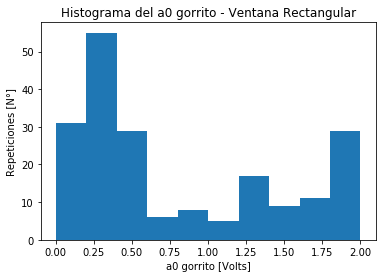

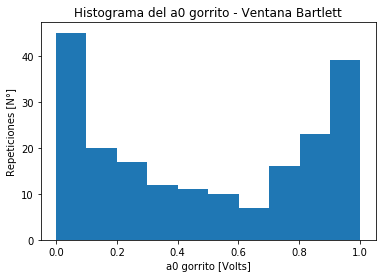

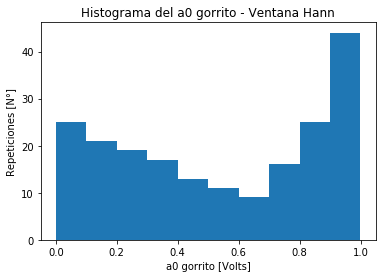

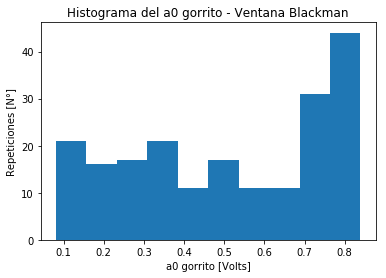

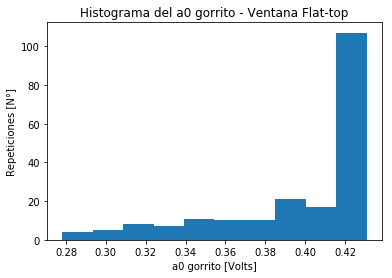

In [11]:
def pltHist(V,n,x,y,title):
    plt.figure()
    plt.hist(V,n)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
##############################################
fs=1000
Ts=1/fs
N=1000
a0=2
p0=0
rep = 200
fr = np.random.uniform(-2,2,(rep,1)) #fr = ruido 200 Realizaciones
sa = np.zeros(5)
va = np.zeros(5)

Om0 = (np.pi)/2 # pi/2
Om1 = Om0 + (fr * 2 * np.pi)/N
FF= (fs/4) / ((np.pi)/2)
ind = int(Om0*FF)

####### Rectangular ########
x = []
for i in range(0,rep):
    t,aux = Senoidal_Generator(fs,(Om1[i]*FF),N,a0,p0)
    x.append(aux)

X_Rec = []
for i in range(0,rep):
    esp,freq = Analizador_de_Espectro(x[i],N,Ts)
    esp = abs(esp)
    X_Rec.append(esp)

a0g = []
for i in range(0,rep):
    a = X_Rec[i]
    a = a.reshape(N,1)
    a0g.append(a[ind]/(N/2))
a0g = np.array(a0g)

pltHist(a0g,10,'a0 gorrito [Volts]','Repeticiones [N°]','Histograma del a0 gorrito - Ventana Rectangular')

mu = float( Mean(a0g,rep) )
sa[0] = mu - a0
va[0] = float( Var_est(a0g,mu,rep ) )

####### Bartlett ########
w = np.array(BartlettW(N)).reshape(N,1)
x = []
for i in range(0,rep):
    t,aux = Senoidal_Generator(fs,(Om1[i]*FF),N,a0,p0)
    x.append(aux*w)

X_Bar = []
for i in range(0,rep):
    esp,freq = Analizador_de_Espectro(x[i],N,Ts)
    esp = abs(esp)
    X_Bar.append(esp)

a0g = []
for i in range(0,rep):
    a = X_Bar[i]
    a = a.reshape(N,1)
    a0g.append(a[ind]/(N/2))
a0g = np.array(a0g)

pltHist(a0g,10,'a0 gorrito [Volts]','Repeticiones [N°]','Histograma del a0 gorrito - Ventana Bartlett')

mu = float( Mean(a0g,rep) )
sa[1] = mu - a0
va[1] = float( Var_est(a0g,mu,rep ) )

####### Hann ########
w = np.array(HannW(N)).reshape(N,1)
x = []
for i in range(0,rep):
    t,aux = Senoidal_Generator(fs,(Om1[i]*FF),N,a0,p0)
    x.append(aux*w)

X_Hann = []
for i in range(0,rep):
    esp,freq = Analizador_de_Espectro(x[i],N,Ts)
    esp = abs(esp)
    X_Hann.append(esp)

a0g = []
for i in range(0,rep):
    a = X_Hann[i]
    a = a.reshape(N,1)
    a0g.append(a[ind]/(N/2))
a0g = np.array(a0g)

pltHist(a0g,10,'a0 gorrito [Volts]','Repeticiones [N°]','Histograma del a0 gorrito - Ventana Hann')

mu = float( Mean(a0g,rep) )
sa[2] = mu - a0
va[2] = float( Var_est(a0g,mu,rep ) )

####### Blackman ########
w = np.array(BlackmanW(N)).reshape(N,1)
x = []
for i in range(0,rep):
    t,aux = Senoidal_Generator(fs,(Om1[i]*FF),N,a0,p0)
    x.append(aux*w)

X_Black = []
for i in range(0,rep):
    esp,freq = Analizador_de_Espectro(x[i],N,Ts)
    esp = abs(esp)
    X_Black.append(esp)

a0g = []
for i in range(0,rep):
    a = X_Black[i]
    a = a.reshape(N,1)
    a0g.append(a[ind]/(N/2))
a0g = np.array(a0g)

pltHist(a0g,10,'a0 gorrito [Volts]','Repeticiones [N°]','Histograma del a0 gorrito - Ventana Blackman')

mu = float( Mean(a0g,rep) )
sa[3] = mu - a0
va[3] = float( Var_est(a0g,mu,rep ) )

####### Flat-top ########
w = np.array(FlatTopW(N)).reshape(N,1)
x = []
for i in range(0,rep):
    t,aux = Senoidal_Generator(fs,(Om1[i]*FF),N,a0,p0)
    x.append(aux*w)

X_FlatTop = []
for i in range(0,rep):
    esp,freq = Analizador_de_Espectro(x[i],N,Ts)
    esp = abs(esp)
    X_FlatTop.append(esp)

a0g = []
for i in range(0,rep):
    a = X_FlatTop[i]
    a = a.reshape(N,1)
    a0g.append(a[ind]/(N/2))
a0g = np.array(a0g)

pltHist(a0g,10,'a0 gorrito [Volts]','Repeticiones [N°]','Histograma del a0 gorrito - Ventana Flat-top')

mu = float( Mean(a0g,rep) )
sa[4] = mu - a0
va[4] = float( Var_est(a0g,mu,rep ) )



In [12]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   [str(round_sig(sa[0],3)), str(round_sig(va[0],3))], # <-- acá debería haber numeritos :)
                   [str(round_sig(sa[1],3)), str(round_sig(va[1],3))], # <-- acá debería haber numeritos :)
                   [str(round_sig(sa[2],3)), str(round_sig(va[2],3))], # <-- acá debería haber numeritos :)
                   [str(round_sig(sa[3],3)), str(round_sig(va[3],3))], # <-- acá debería haber numeritos :)
                   [str(round_sig(sa[4],3)), str(round_sig(va[4],3))], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,-1.2,0.44
Bartlett,-1.51,0.131
Hann,-1.46,0.116
Blackman,-1.48,0.0625
Flat-top,-1.6,0.00167


<div class="alert alert-block alert-info">
<b>3.b)</b> Repita a) para el siguiente estimador:
</div>

 
  $ \hat{a_1} = \sqrt{\frac{1}{5}·\sum_{j=a}^{b} \lvert X^i_w(j) \rvert ^2} $
  
siendo $ a = \Omega_0 - 2·\frac{2\pi}{N} $ y $ b = \Omega_0 + 2·\frac{2\pi}{N} $

para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

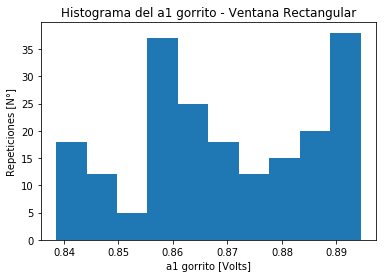

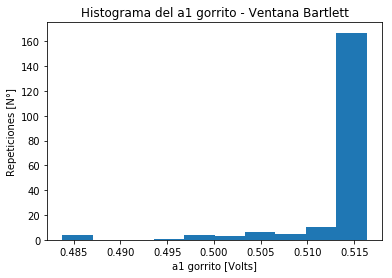

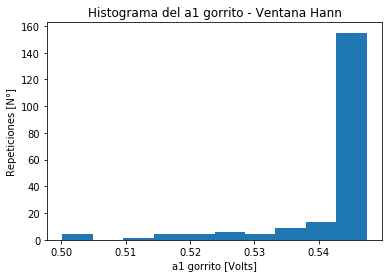

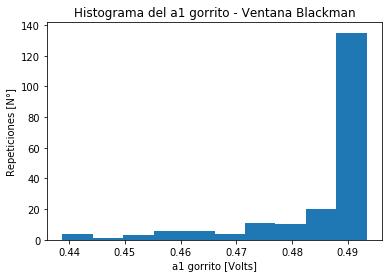

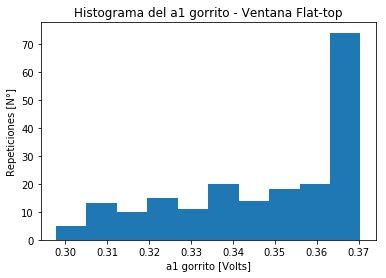

In [13]:
sa = np.zeros(5)
va = np.zeros(5)

###### Rectangular ######
a1g = []
for i in range(0,rep):
    a1g.append( RMS_est(X_Rec[i],N) )
pltHist(np.array(a1g),10,'a1 gorrito [Volts]','Repeticiones [N°]','Histograma del a1 gorrito - Ventana Rectangular')

mu = float( Mean(a1g,rep) )
sa[0] = mu - a0/(2**(0.5))
va[0] = float( Var_est(a1g,mu,rep ) )

###### Bartlett ######
a1g = []
for i in range(0,rep):
    a1g.append( RMS_est(X_Bar[i],N) )
pltHist(np.array(a1g),10,'a1 gorrito [Volts]','Repeticiones [N°]','Histograma del a1 gorrito - Ventana Bartlett')

mu = float( Mean(a1g,rep) )
sa[1] = mu - a0/(2**(0.5))
va[1] = float( Var_est(a1g,mu,rep ) )

###### Hann ######
a1g = []
for i in range(0,rep):
    a1g.append( RMS_est(X_Hann[i],N) )
pltHist(np.array(a1g),10,'a1 gorrito [Volts]','Repeticiones [N°]','Histograma del a1 gorrito - Ventana Hann')

mu = float( Mean(a1g,rep) )
sa[2] = mu - a0/(2**(0.5))
va[2] = float( Var_est(a1g,mu,rep ) )

###### Blackman ######
a1g = []
for i in range(0,rep):
    a1g.append( RMS_est(X_Black[i],N) )
pltHist(np.array(a1g),10,'a1 gorrito [Volts]','Repeticiones [N°]','Histograma del a1 gorrito - Ventana Blackman')

mu = float( Mean(a1g,rep) )
sa[3] = mu - a0/(2**(0.5))
va[3] = float( Var_est(a1g,mu,rep ) )

###### Flat-top ######
a1g = []
for i in range(0,rep):
    a1g.append( RMS_est(X_FlatTop[i],N) )
pltHist(np.array(a1g),10,'a1 gorrito [Volts]','Repeticiones [N°]','Histograma del a1 gorrito - Ventana Flat-top')

mu = float( Mean(a1g,rep) )
sa[4] = mu - a0/(2**(0.5))
va[4] = float( Var_est(a1g,mu,rep ) )

In [14]:
tus_resultados = [ 
                   [str(round_sig(sa[0],3)), str(round_sig(va[0],3))], # <-- acá debería haber numeritos :)
                   [str(round_sig(sa[1],3)), str(round_sig(va[1],3))], # <-- acá debería haber numeritos :)
                   [str(round_sig(sa[2],3)), str(round_sig(va[2],3))], # <-- acá debería haber numeritos :)
                   [str(round_sig(sa[3],3)), str(round_sig(va[3],3))], # <-- acá debería haber numeritos :)
                   [str(round_sig(sa[4],3)), str(round_sig(va[4],3))], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,-0.545,0.000298
Bartlett,-0.9,3.28e-05
Hann,-0.871,8.93e-05
Blackman,-0.928,0.000149
Flat-top,-1.07,0.000445
